# UTS Model Deployment Soal 1B
### Name: Benjamin Eleazar Manafe
### NIM: 2702340704

### Anda adalah seorang data scientist dari suatu Perusahaan dan diminta untuk membuat dan mengdeploy model machine learning dalam melakukan klasifikasi berdasarkan case sesuai dengan dataset yang Anda dapatkan dari ketentuan sebelumnya. 

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### [LO 1, LO 2 – 30 Poin] Buatlah model machine learning yang berisi proses pre-processing machine learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan dengan extension .ipynb

# 1. EDA & Data Cleaning

In [232]:
data = pd.read_csv('Dataset_B_hotel.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


| Column Name | Description |
|---|---|
| Booking_ID | Pengenal unik dari tiap pemesanan |
| no_of_adults | Jumlah orang dewasa |
| no_of_children | Jumlah anak kecil |
| no_of_weekend_nights | Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel |
| no_of_week_nights | Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel |
| type_of_meal_plan | Jenis paket makanan yang dipesan oleh pelanggan |
| required_car_parking_space | Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1 - Ya) |
| room_type_reserved | Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels |
| lead_time | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan |
| arrival_year | Tahun tanggal kedatangan |
| arrival_month | Bulan tanggal kedatangan |
| arrival_date | Tanggal kedatangan |
| market_segment_type | Penunjukan segmen pasar |
| repeated_guest | Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1 - Ya) |
| no_of_previous_cancellations | Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini |
| no_of_previous_bookings_not_canceled | Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini |
| avg_price_per_room | Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro) |
| no_of_special_requests | Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan lain-lain.) |
| booking_status (target variable) | Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak. |

## 1.1 Data Conversion

In [233]:
num_cols = ['no_of_adults', 
            'no_of_children',
            'no_of_weekend_nights',
            'no_of_week_nights',
            'lead_time',
            'no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled',
            'avg_price_per_room',
            'no_of_special_requests']
cat_cols = [col for col in data.columns if col not in num_cols and col != 'booking_status' and col != 'Booking_ID']

num_cols, cat_cols

(['no_of_adults',
  'no_of_children',
  'no_of_weekend_nights',
  'no_of_week_nights',
  'lead_time',
  'no_of_previous_cancellations',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room',
  'no_of_special_requests'],
 ['type_of_meal_plan',
  'required_car_parking_space',
  'room_type_reserved',
  'arrival_year',
  'arrival_month',
  'arrival_date',
  'market_segment_type',
  'repeated_guest'])

In [234]:
for col in cat_cols:
    try:
        data[col] = data[col].astype(object)
    except Exception as e:
        print(e)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

In [235]:
data.duplicated().sum()

np.int64(0)

## 1.2 Data Splitting

In [236]:
from sklearn.model_selection import train_test_split

X = data
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(29020, 7255, 29020, 7255)

## 1.3 Data Cleaning

In [237]:
X_train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,27741.000000,29020.000000
mean,1.844280,0.106306,0.807822,2.202068,85.376085,0.023880,0.154721,103.508168,0.619917
std,0.518692,0.405391,0.868111,1.402801,85.859070,0.375994,1.777787,35.198727,0.786348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.470000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,58.000000,0.000000,0.000000,99.900000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,127.000000,0.000000,0.000000,120.350000,1.000000
max,4.000000,10.000000,6.000000,17.000000,443.000000,13.000000,58.000000,375.500000,5.000000


In [238]:
X_train.describe(include='O')

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,booking_status
count,29020,28284,27981.0,29020,29020,29020,29020,29020,29020,29020
unique,29020,4,2.0,7,2,12,31,5,2,2
top,INN15796,Meal Plan 1,0.0,Room_Type 1,2018,10,19,Online,0,Not_Canceled
freq,1,21726,27081.0,22489,23809,4263,1087,18550,28272,19551


### 1.3.1 Categorical Columns

In [239]:
for col in cat_cols:
    print(f'---- {col} ----')
    print(X_train[col].unique(), '\n')

---- type_of_meal_plan ----
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' nan 'Meal Plan 3'] 

---- required_car_parking_space ----
[0.0 1.0 nan] 

---- room_type_reserved ----
['Room_Type 1' 'Room_Type 6' 'Room_Type 5' 'Room_Type 4' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3'] 

---- arrival_year ----
[2017 2018] 

---- arrival_month ----
[10 7 9 8 6 4 5 12 3 2 11 1] 

---- arrival_date ----
[17 16 8 15 6 13 21 20 12 30 11 10 25 29 26 28 1 4 23 3 19 31 5 2 7 9 14
 18 24 22 27] 

---- market_segment_type ----
['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation'] 

---- repeated_guest ----
[0 1] 



Things to look at:
- type_of_meal_plan
- required_car_parking_space

In [240]:
X_train['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     21726
Not Selected     3963
Meal Plan 2      2591
Meal Plan 3         4
Name: count, dtype: int64

In [241]:
X_train['type_of_meal_plan'].isnull().sum(), X_train['type_of_meal_plan'].isnull().sum()/len(X_train)

(np.int64(736), np.float64(0.025361819434872503))

In [242]:
X_train.loc[X_train['type_of_meal_plan'].isnull(), 'type_of_meal_plan'] = 'Meal Plan 1'
X_train['type_of_meal_plan'].isnull().sum()

np.int64(0)

In [243]:
X_test.loc[X_test['type_of_meal_plan'].isnull(), 'type_of_meal_plan'] = 'Meal Plan 1'

In [244]:
X_train['required_car_parking_space'].value_counts()

required_car_parking_space
0.0    27081
1.0      900
Name: count, dtype: int64

In [245]:
X_train['required_car_parking_space'].isnull().sum(), X_train['required_car_parking_space'].isnull().sum()/len(X_train)

(np.int64(1039), np.float64(0.03580289455547898))

In [246]:
X_train.loc[X_train['required_car_parking_space'].isnull(), 'required_car_parking_space'] = 0
X_train['required_car_parking_space'].isnull().sum()

np.int64(0)

In [247]:
X_test.loc[X_test['required_car_parking_space'].isnull(), 'required_car_parking_space'] = 0

In [248]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

oe_cols = ['arrival_month',
           'arrival_date']

ohe_cols = ['type_of_meal_plan',
            'required_car_parking_space',
            'room_type_reserved',
            'arrival_year',
            'market_segment_type',
            'repeated_guest']

month_categories = list(range(1, 13))
date_categories = list(range(1, 32))
booking_status_categories = list(range(0, 2))

ordinal_mapping = {
    'arrival_month': month_categories,
    'arrival_date': date_categories,
    'booking_status': booking_status_categories
}

oe = OrdinalEncoder(categories=[ordinal_mapping.get(col, sorted(X_train[col].unique())) for col in oe_cols])
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers = [
        ('ordinal', oe, oe_cols),
        ('onehot', ohe, ohe_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_encoded = pipeline.fit_transform(X_train[cat_cols])
X_test_encoded = pipeline.transform(X_test[cat_cols])

oe_feature_names = oe_cols
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(input_features=ohe_cols)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=oe_feature_names + ohe_feature_names.tolist(), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=oe_feature_names + ohe_feature_names.tolist(), index=X_test.index)

In [249]:
y_train = y_train.map({'Canceled': 1, 'Not_Canceled': 0})
y_test = y_test.map({'Canceled': 1, 'Not_Canceled': 0})

In [250]:
X_train = X_train.drop(cat_cols, axis=1)
X_train = X_train.drop(['booking_status', 'Booking_ID'], axis=1)
X_test = X_test.drop(cat_cols, axis=1)
X_test = X_test.drop(['booking_status', 'Booking_ID'], axis=1)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

X_train['booking_status'] = y_train
X_test['booking_status'] = y_test

### 1.3.2 Numerical Columns

#### Missing Columns

In [251]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   lead_time                             29020 non-null  int64  
 5   no_of_previous_cancellations          29020 non-null  int64  
 6   no_of_previous_bookings_not_canceled  29020 non-null  int64  
 7   avg_price_per_room                    27741 non-null  float64
 8   no_of_special_requests                29020 non-null  int64  
 9   arrival_month                         29020 non-null  float64
 10  arrival_date                          29020 non-null  float64
 11  type_of_meal_pla

In [252]:
missing_columns = X_train.isnull().sum()
missing_columns[missing_columns > 0]

avg_price_per_room    1279
dtype: int64

In [253]:
X_train['avg_price_per_room'].describe()

count    27741.000000
mean       103.508168
std         35.198727
min          0.000000
25%         80.470000
50%         99.900000
75%        120.350000
max        375.500000
Name: avg_price_per_room, dtype: float64

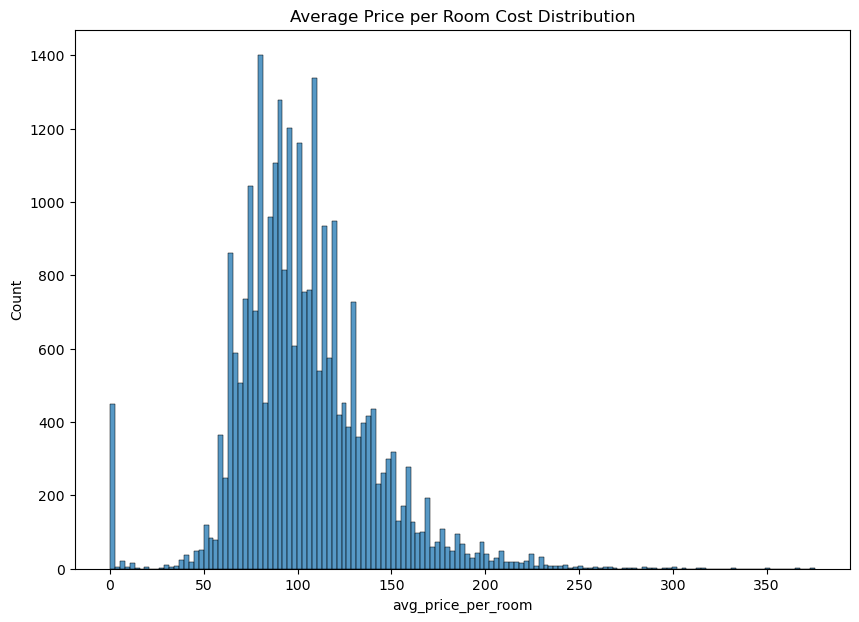

In [254]:
plt.figure(figsize=(10, 7))
sns.histplot(X_train['avg_price_per_room'])
plt.title('Average Price per Room Cost Distribution')
plt.show()

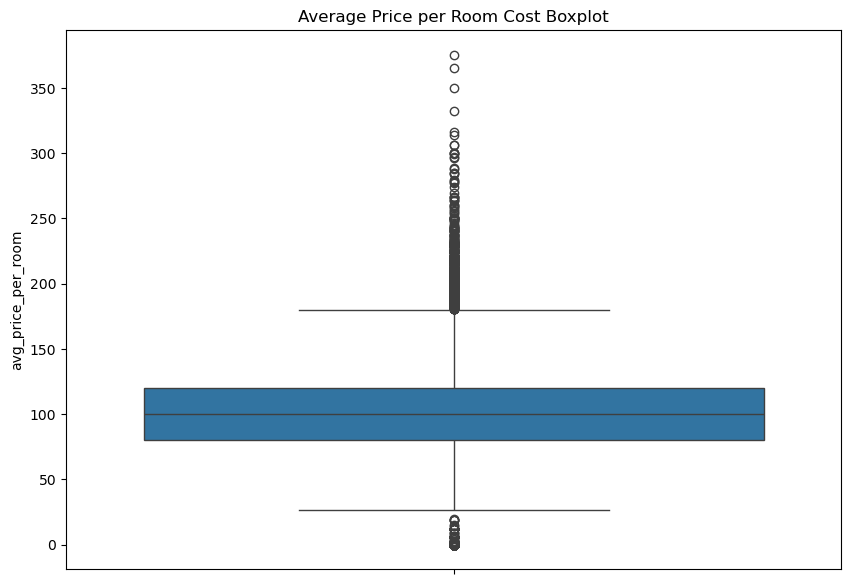

In [255]:
plt.figure(figsize=(10, 7))
sns.boxplot(X_train['avg_price_per_room'])
plt.title('Average Price per Room Cost Boxplot')
plt.show()

In [256]:
avg_avg_price_per_room = round(X_train['avg_price_per_room'].mean(), 1)
avg_avg_price_per_room

np.float64(103.5)

In [257]:
X_train.loc[X_train['avg_price_per_room'].isnull(), 'avg_price_per_room'] = avg_avg_price_per_room
X_train[X_train['avg_price_per_room'].isnull()]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_0.0,required_car_parking_space_1.0,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2017,arrival_year_2018,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_0,repeated_guest_1,booking_status


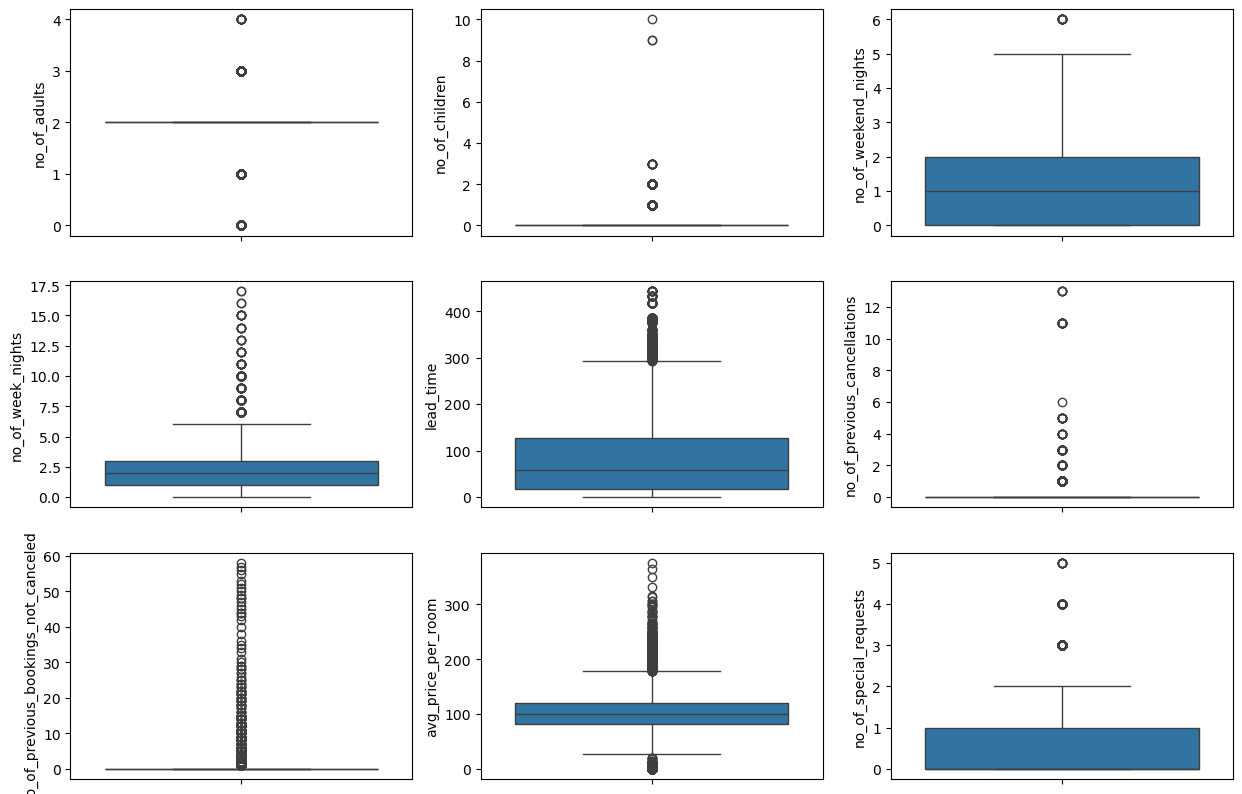

In [258]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(X_train[col])

In [259]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('scaler', scaler, num_cols),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_scaled = pipeline.fit_transform(X_train[num_cols])
X_test_scaled = pipeline.transform(X_test[num_cols])

scaled_feature_names = num_cols
all_feature_names = scaled_feature_names

X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=X_test.index)

In [260]:
X_train = X_train.drop(num_cols, axis=1)
X_test = X_test.drop(num_cols, axis=1)

X_train = pd.concat([X_train, X_train_scaled], axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)

In [261]:
X_train = X_train.drop(['booking_status'], axis=1)
X_test = X_test.drop(['booking_status'], axis=1)

# 2. Modelling

## 2.1 Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid_rfc = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 10],
}

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_rfc.fit(X_train, y_train)

print('Best parameters found by GridSearchCV in RandomForestClassifier:', grid_search_rfc.best_params_)

print('Training Score RandomForestClassifier: ', grid_search_rfc.score(X_train, y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found by GridSearchCV in RandomForestClassifier: {'max_depth': 10, 'n_estimators': 500}
Training Score RandomForestClassifier:  0.8764989662301861


## 2.2 XGBoost

In [263]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

param_grid_xgb = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 700],
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

print('Best parameters found by GridSearchCV in XGBClassifier:', grid_search_xgb.best_params_)

print('Training Score XGBClassifier: ', grid_search_xgb.score(X_train, y_train))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found by GridSearchCV in XGBClassifier: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 700}
Training Score XGBClassifier:  0.9900758097863542


# 3. Evaluation

In [264]:
from sklearn.metrics import classification_report

rfc_pred = grid_search_rfc.predict(X_test)
xgb_pred = grid_search_xgb.predict(X_test)

print(classification_report(rfc_pred, y_test))
print('-'*60)
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      5255
           1       0.71      0.86      0.78      2000

    accuracy                           0.86      7255
   macro avg       0.82      0.86      0.84      7255
weighted avg       0.88      0.86      0.87      7255

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4836
           1       0.84      0.84      0.84      2419

    accuracy                           0.89      7255
   macro avg       0.88      0.88      0.88      7255
weighted avg       0.89      0.89      0.89      7255



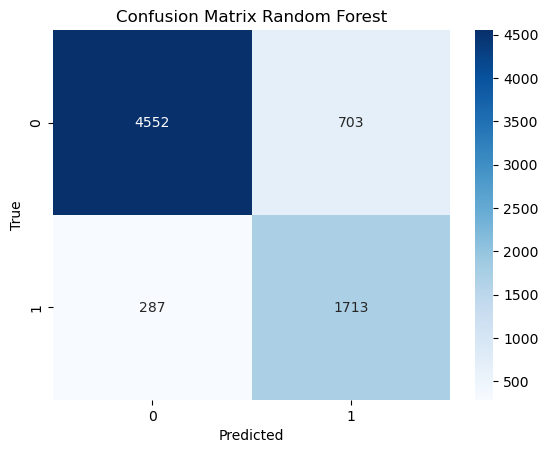

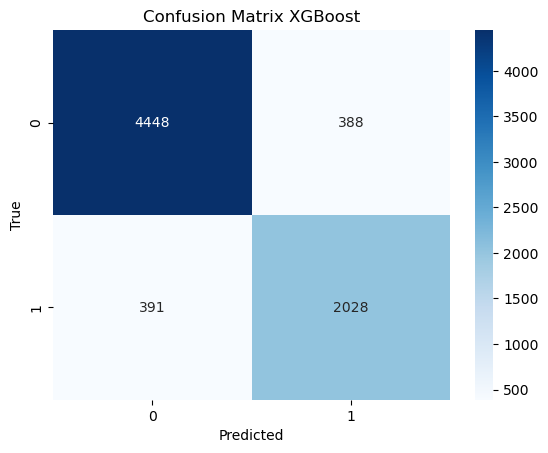

In [265]:
from sklearn.metrics import confusion_matrix

conf_mat_rfc = confusion_matrix(rfc_pred, y_test)
conf_mat_xgb = confusion_matrix(xgb_pred, y_test)


sns.heatmap(conf_mat_rfc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Random Forest')
plt.show()
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix XGBoost')
plt.show()

# 4. Model Saving

In [267]:
import pickle as pkl

filename = 'best_model_xgb.pkl'
with open(filename, 'wb') as f:
    pkl.dump(grid_search_rfc, f)

print(f'Trained model saved to {filename}')

Trained model saved to best_model_xgb.pkl
